In [1]:
from __future__ import print_function 
import os, sys, h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from six.moves import cPickle
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score, roc_auc_score

sys.path.append('..')
import helper
from deepomics import neuralnetwork as nn
from deepomics import utils, fit

In [19]:
models = ['affinity_residual_net', 'affinity_conv_net', 'affinity_all_conv_net']
normalize_method = 'log_norm' 
ss_type = 'seq'

# path where model parameters are saved
best_path = '../../results/RNAcompete_2013/'+normalize_method+'_'+ss_type

# get list of rnacompete experiments
data_path = '../../data/RNAcompete_2013/rnacompete2013.h5'
experiments = helper.get_experiments_hdf5(data_path)

mean_predictions = []
rbp_index = 0
for rbp_index in range(len(experiments)):
    print(str(rbp_index) + '. '+ experiments[rbp_index])
    # load rbp dataset
    train, valid, test = helper.load_dataset_hdf5(data_path, ss_type=ss_type, rbp_index=rbp_index)

    # process rbp dataset
    train, valid, test = helper.process_data(train, valid, test, method=normalize_method)

    # get shapes
    input_shape = list(train['inputs'].shape)
    input_shape[0] = None
    output_shape = train['targets'].shape

    predictions = []
    for model in models:

        # load model
        genome_model = helper.import_model(model)
        model_layers, optimization = genome_model.model(input_shape, output_shape)

        # build neural network class
        nnmodel = nn.NeuralNet(seed=247)
        nnmodel.build_layers(model_layers, optimization, use_scope=False)

        file_path = os.path.join(best_path, model, experiments[rbp_index])
        nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

        # initialize session
        sess = utils.initialize_session(nnmodel.placeholders)

        # load best model
        nntrainer.set_best_parameters(sess, verbose=0)

        predictions.append(nntrainer.get_activations(sess, test))

    predictions = np.hstack(predictions)
    scores = []
    for i in range(3):
        score = np.corrcoef(predictions[:,i], test['targets'][:,0])[0,1]
        scores.append(score)
        print("\t%s:\t%.4f"%(models[i], score))
    
    mean_pred = np.mean(predictions,axis=1)
    mean_score = np.corrcoef(mean_pred, test['targets'][:,0])[0,1]
    scores.append(mean_score)
    print("\t\t\tmean:\t%.4f"%(mean_score)) 

    # store results
    mean_predictions.append(scores)

0. RNCMPT00100
	affinity_residual_net:	0.7930
	affinity_conv_net:	0.7638
	affinity_all_conv_net:	0.7781
			mean:	0.8019
1. RNCMPT00101
	affinity_residual_net:	0.7687
	affinity_conv_net:	0.7077
	affinity_all_conv_net:	0.7357
			mean:	0.7764
2. RNCMPT00102
	affinity_residual_net:	0.0586
	affinity_conv_net:	0.0602
	affinity_all_conv_net:	0.0485
			mean:	0.0684
3. RNCMPT00103
	affinity_residual_net:	0.4469
	affinity_conv_net:	0.4055
	affinity_all_conv_net:	0.4009
			mean:	0.4610
4. RNCMPT00104
	affinity_residual_net:	0.4300
	affinity_conv_net:	0.3920
	affinity_all_conv_net:	0.3824
			mean:	0.4508
5. RNCMPT00105
	affinity_residual_net:	0.1563
	affinity_conv_net:	0.1510
	affinity_all_conv_net:	0.1465
			mean:	0.1585
6. RNCMPT00106
	affinity_residual_net:	0.7472
	affinity_conv_net:	0.7909
	affinity_all_conv_net:	0.7974
			mean:	0.8026
7. RNCMPT00107
	affinity_residual_net:	0.8664
	affinity_conv_net:	0.8427
	affinity_all_conv_net:	0.8534
			mean:	0.8716
8. RNCMPT00108
	affinity_residual_net:	0

In [23]:
mean_predictions = np.array(mean_predictions)
np.mean(mean_predictions, axis=0)

array([ 0.66605579,  0.6372176 ,  0.64803077,  0.6719893 ])

In [45]:
models = ['affinity_residual_net', 'affinity_conv_net', 'affinity_all_conv_net']
normalize_method = 'log_norm' 
ss_type = 'seq'

# path where model parameters are saved
best_path = '../../results/RNAcompete_2013/'+normalize_method+'_'+ss_type

# get list of rnacompete experiments
data_path = '../../data/RNAcompete_2013/rnacompete2013.h5'
experiments = helper.get_experiments_hdf5(data_path)

rbp_index = 69
print(str(rbp_index) + '. '+ experiments[rbp_index])
# load rbp dataset
train, valid, test = helper.load_dataset_hdf5(data_path, ss_type=ss_type, rbp_index=rbp_index)

# process rbp dataset
train, valid, test = helper.process_data(train, valid, test, method=normalize_method)

# get shapes
input_shape = list(train['inputs'].shape)
input_shape[0] = None
output_shape = train['targets'].shape

predictions = []
for model in models:

    # load model
    genome_model = helper.import_model(model)
    model_layers, optimization = genome_model.model(input_shape, output_shape)

    # build neural network class
    nnmodel = nn.NeuralNet(seed=247)
    nnmodel.build_layers(model_layers, optimization, use_scope=False)

    file_path = os.path.join(best_path, model, experiments[rbp_index])
    nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

    # initialize session
    sess = utils.initialize_session(nnmodel.placeholders)

    # load best model
    nntrainer.set_best_parameters(sess, verbose=0)

    predictions.append(nntrainer.get_activations(sess, test))

predictions = np.hstack(predictions)
for i in range(3):
    score = np.corrcoef(predictions[:,i], test['targets'][:,0])[0,1]
    print("\t%s:\t%.4f"%(models[i], score))

mean_pred = np.mean(predictions,axis=1)
mean_score = np.corrcoef(mean_pred, test['targets'][:,0])[0,1]
print("\t\t\tmean:\t%.4f"%(mean_score)) 

69. RNCMPT00168
	affinity_residual_net:	0.8084
	affinity_conv_net:	0.7419
	affinity_all_conv_net:	0.7898
			mean:	0.8068


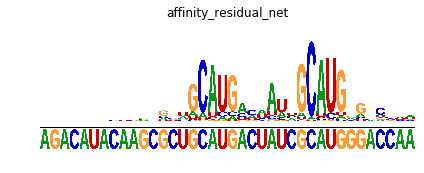

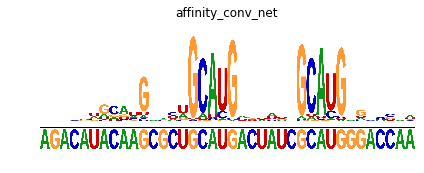

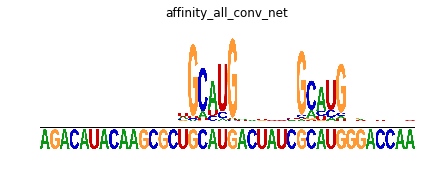

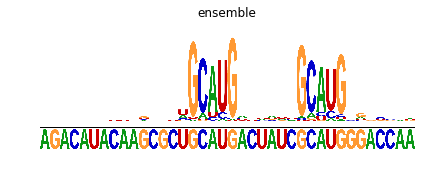

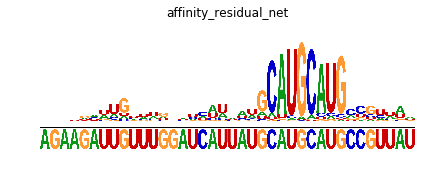

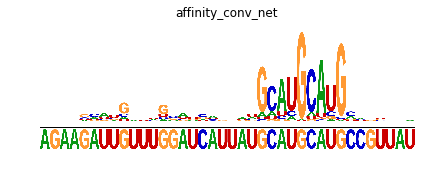

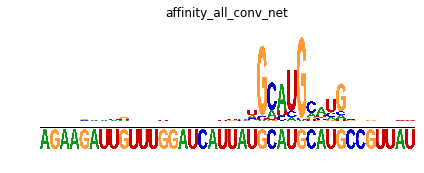

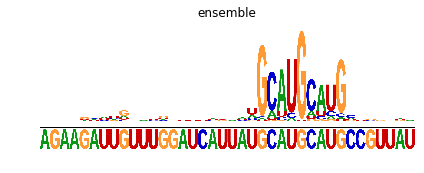

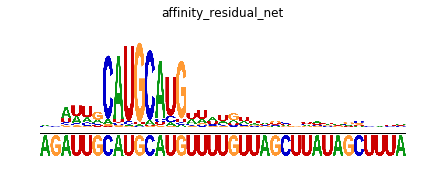

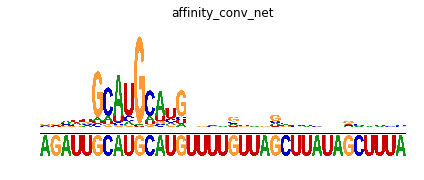

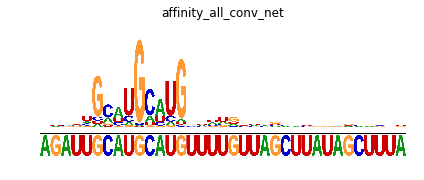

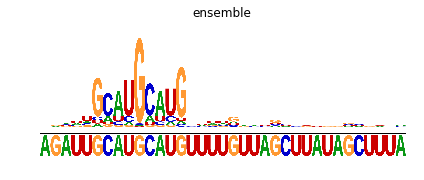

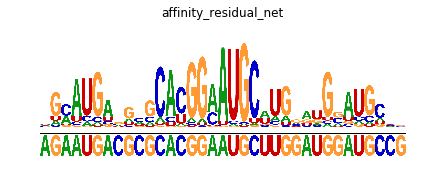

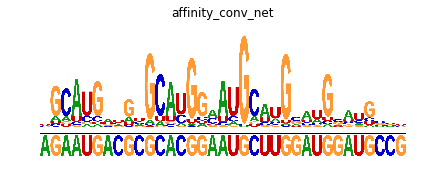

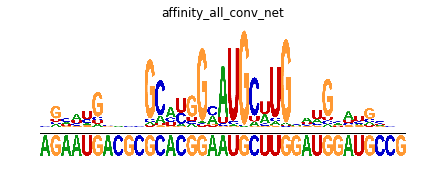

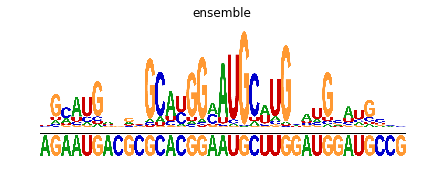

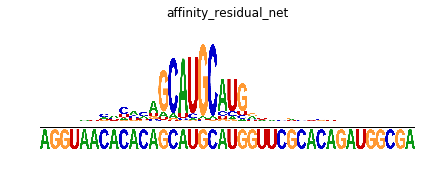

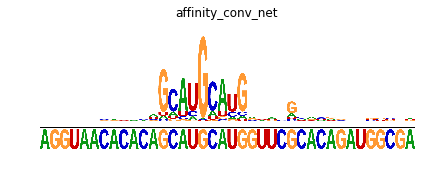

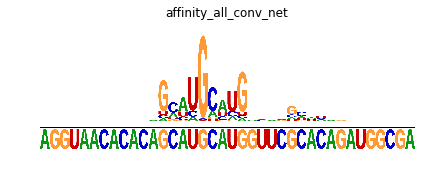

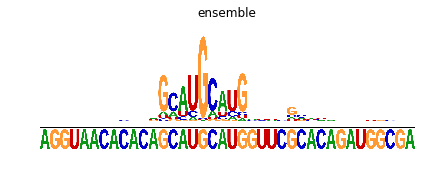

In [46]:
from deepomics import saliency, visualize
num_plots = 5
max_indices = np.argsort(mean_pred)[::-1]  
plot_range = range(0,num_plots)
plot_index = max_indices[plot_range]


for i in range(num_plots):

    X = np.expand_dims(test['inputs'][plot_index[i]], axis=0)

    guided_saliency = []
    for model in models:
        # load model
        genome_model = helper.import_model(model)

        # parameters for saliency analysis
        params = {'genome_model': genome_model.model, 
                  'input_shape': input_shape, 
                  'output_shape': output_shape, 
                  'model_path': os.path.join(best_path, model, experiments[rbp_index]+'_best.ckpt'),
                  'optimization': optimization,
                  'use_scope': False,
                 }

        # guided backprop saliency
        guided_saliency.append(saliency.guided_backprop(X, layer='output', class_index=0, params=params))
    
    
    for j in range(3):
        MAX = np.max(guided_saliency[j])
        guided_saliency[j] = guided_saliency[j]/MAX
        
    mean_saliency = np.mean(np.array(guided_saliency), axis=0)
    
    
    for j in range(3):
        fig = plt.figure()
        plt = visualize.plot_seq_pos_saliency(np.squeeze(X).T, np.squeeze(guided_saliency[j]).T, alphabet='rna')
        plt.title(models[j])
    fig = plt.figure()
    plt = visualize.plot_seq_pos_saliency(np.squeeze(X).T, np.squeeze(mean_saliency).T, alphabet='rna')
    plt.title('ensemble')